----

#  Paso 1. Abre el archivo de datos y estudia la información general  y Paso 2. Prepara los datos

In [16]:
import pandas as pd

games = pd.read_csv("/datasets/games.csv")

games.info(show_counts=True)

games.columns = games.columns.str.lower()

display(games)

# Convierte los datos en los tipos necesarios.

# Convertir Year_of_Release a Int64  y checar que las fechas todas sena numeros(manteniendo NaN)
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')
games['year_of_release'] = games['year_of_release'].astype('Int64')

display(games[['year_of_release']].head(10))

# Convertir Critic_Score a Int64 
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games['critic_score'] = games['critic_score'].astype('Int64')

display(games[['critic_score']].head(10))

# Convertir User_Score de object  float (reemplazar 'tbd' con NaN)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

display(games[['user_score']].head(10))

# Convertir Rating a categoría
games['rating'] = games['rating'].astype('category')

# Convertir Platform y Genre a categoría
games['platform'] = games['platform'].astype('category')
games['genre'] = games['genre'].astype('category')

# Verificar cambios
display(games.dtypes)
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,year_of_release
0,2006
1,1985
2,2008
3,2009
4,1996
5,1989
6,2006
7,2006
8,2009
9,1984


,critic_score
0,76
1,<NA>
2,82
3,80
4,<NA>
5,<NA>
6,89
7,58
8,87
9,<NA>


,user_score
0,8.0
1,NaN
2,8.3
3,8.0
4,NaN
5,NaN
6,8.5
7,6.6
8,8.4
9,NaN


name                 object
platform           category
year_of_release       Int64
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score          Int64
user_score          float64
rating             category
dtype: object

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Cambie las columna year of release ya que estaba como un numero flotante y ya que son fechas lo mejor es tenerlo como numeros enteros.
De igual manera modifique critic score estaba como numeros flotantes y en este caso se especifica que son un maximo de 100 por lo que es mejor en mi opinion dejarlo como numero entero ya que hay un gran rango de numeros.
En el caso  de user score estaba como object y decidi cambiarlo a flotante para poder manejar la informacion y tener detalle y poder analizar el puntuaje.
Y para finalizar Genre, platform y Rating los modifique a category ya que tengo entendido auqnue object almacena cadenas de texto de manera más flexible,esto puede ser ineficiente cuando hay muchas repeticiones de valores similares y y category mejora rendimiento.


In [ ]:

# Eliminamos filas donde de 'name' o 'genre' que esten ya que solo son 2 
games = games.dropna(subset=['name', 'genre'])

# Rellenamos 'year_of_release' con 0 ya que hay 269 datos que pueden ser utiles
games['year_of_release'] = games['year_of_release'].fillna(0)

# Rellenamos 'critic_score' con la media
games['critic_score'] = games['critic_score'].fillna(round(games['critic_score'].mean())).astype('Int64')


display(games.isnull().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9123
rating             6764
dtype: int64

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Los valores ausentes pueden deberse a diferentes razones dependiendo de la columna. aqui hay unas razones posibles, para cada caso:

year of release
La información no estaba disponible cuando se recopiló el dataset.
Errores en la base de datos al ingresar los datos.
Juegos sin fecha oficial de lanzamiento (por ejemplo, cancelados o en acceso anticipado).

critic score
El juego nunca recibió una calificación de la crítica.
Juegos poco conocidos que no fueron evaluados.

user score
Juegos nuevos que aún no han recibido suficientes calificaciones.
Falta de datos debido a problemas en la plataforma donde se recopilaron.
El valor 'tbd' (To Be Determined) indica que la calificación aún no está disponible.

rating
Errores en la base de datos.
Juegos independientes que no requieren clasificación oficial.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

TBD ya lo maneje con mi codigo anterior los converti en Nan para que no interrumpen los cálculos y no afectan el análisis posterior.


Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [11]:

# Sume todas las ventas de todas las regiones y agregue como una nueva columna 'total_sales'
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# solo para verificar el resultado
display(games[['name', 'total_sales']].head(20))

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.91
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


#  Paso 3. Analiza los datos

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

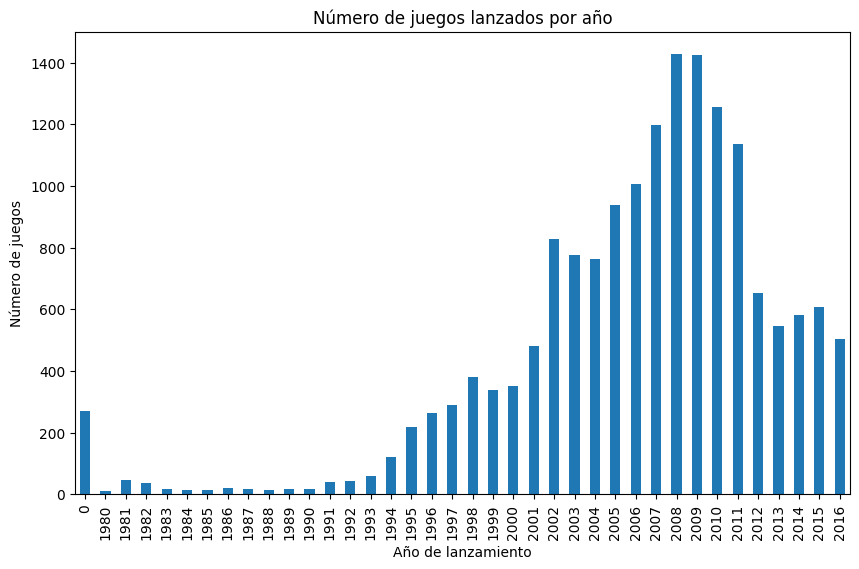

In [16]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games_by_year = games['year_of_release'].value_counts().sort_index()

display(games_by_year)

# Visualizar si la distribución es significativa
import matplotlib.pyplot as plt

# Gráfico de barras para ver la distribución
plt.figure(figsize=(10, 6))
games_by_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=90)
plt.show()

¿Son significativos los datos de cada período?

Los datos de los años más recientes (2000-2016) son mucho más representativos y significativos nos muestra el crecimiento de la industria de los videojuegos. Los años más antiguos (1980-1995) ofrecen una visión más histórica, pero debido a que los videojuegos no eran tan famosos en ese entonces no hay un gran numero en comparacion a las siguientes fechas y con respecto al año 0 se puede no tomar en cuenta o excluir ya que son datos de los cuales no se tiene informacion de la fecha exacta.


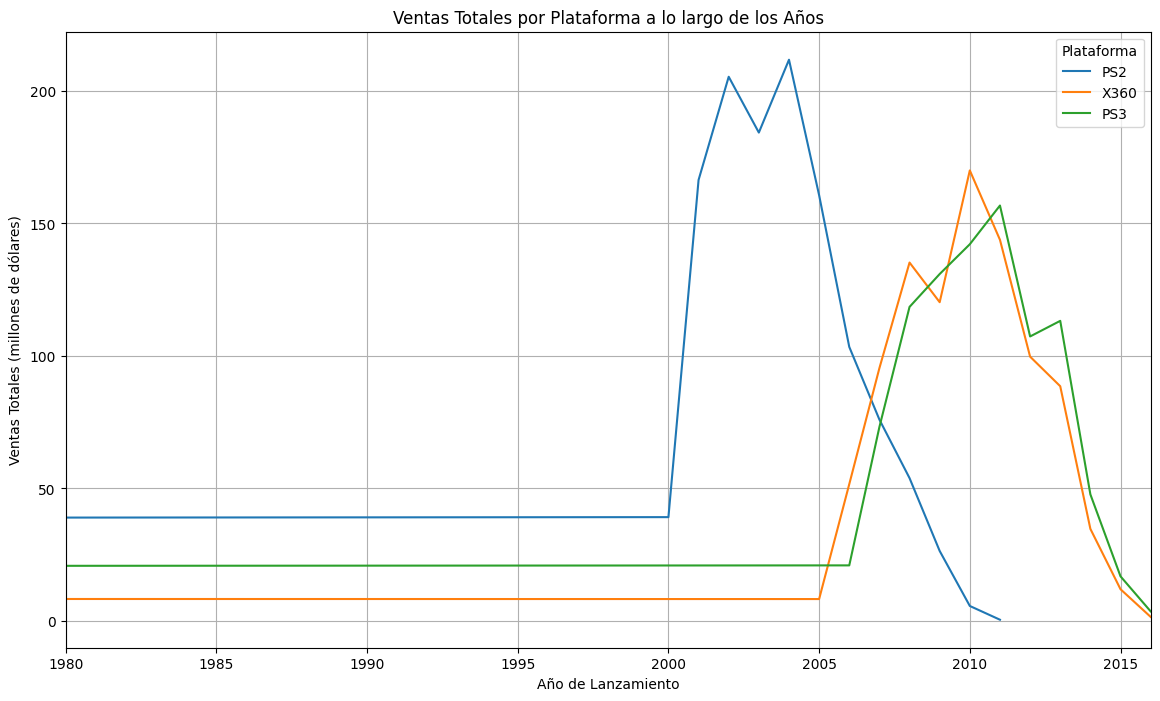

Plataformas sin ventas recientes (último lanzamiento antes de 2016):


platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
Name: year_of_release, dtype: Int64


Duración de vida de las plataformas:


platform
2600    1989
3DO        1
3DS     2016
DC        10
DS      2013
GB      2001
GBA     2007
GC      2007
GEN        4
GG         0
N64     2002
NES       11
NG         3
PC      2016
PCFX       0
PS      2003
PS2     2011
PS3     2016
PS4        3
PSP     2015
PSV     2016
SAT        5
SCD        1
SNES       9
TG16       0
WS         2
Wii     2016
WiiU       4
X360    2016
XB      2008
XOne       3
Name: year_of_release, dtype: Int64

In [15]:

# con esto filtro las plataformas con mayores ventas totales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Muestro las 10 plataformas con mayores ventas
top_platforms = platform_sales.head(3)

# Filtramos los datos para las plataformas más populares
top_platforms_data = games[games['platform'].isin(top_platforms.index)]

plt.figure(figsize=(14, 8))
for platform in top_platforms.index:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year, label=platform)

plt.title('Ventas Totales por Plataforma a lo largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones de dólares)')
# Establecer el rango de los años visibles en el eje X
plt.xlim(1980, 2016)
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

# con este codigo buscamos plataformas que fueron populares pero ya no tienen ventas recientes
platform_last_sales = games.groupby('platform')['year_of_release'].max()
platform_no_sales = platform_last_sales[platform_last_sales < 2016]  # Plataformas sin ventas recientes

# Mostrar plataformas sin ventas recientes
print("Plataformas sin ventas recientes (último lanzamiento antes de 2016):")
display(platform_no_sales.head())

# Calculo el tiempo de vida de las plataformas (de su primer lanzamiento al último)
platform_first_sales = games.groupby('platform')['year_of_release'].min()
platform_lifespan = platform_last_sales - platform_first_sales

# Mostrar la duración de vida de las plataformas
print("\nDuración de vida de las plataformas:")
display(platform_lifespan.head(100))


¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

en comparacion hay consolas viejas como el Nes que tiene registro de 11 años de estar en el mercado y desapareceren comparacion de algunas consolas nuevas que cada cierto tiempo estan desapareciendo por un modelo mas nuevo con nueva tecnologia.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Para construir un modelo que prediga ventas o lanzamientos en 2017, lo más recomendable es trabajar con datos desde 2010 hasta 2016, ya que reflejan mejor las tendencias actuales del mercado. Usar datos demasiado antiguos podría sesgar el modelo con información irrelevante para la industria en 2017.


¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

segun los datos  las plataformas lideres en ventas son PC, Ps2 y DS.
Es dificil que una plataforma se mantuviera con el tiempo como fue en el caso de ps2 que tuvo vario picos y caidas todas las demas plataformas tenian un punto de crecimiento y de ahi solo decaian.

Considero que las mas rentables son PS2, PC, Xbox 360 y DS

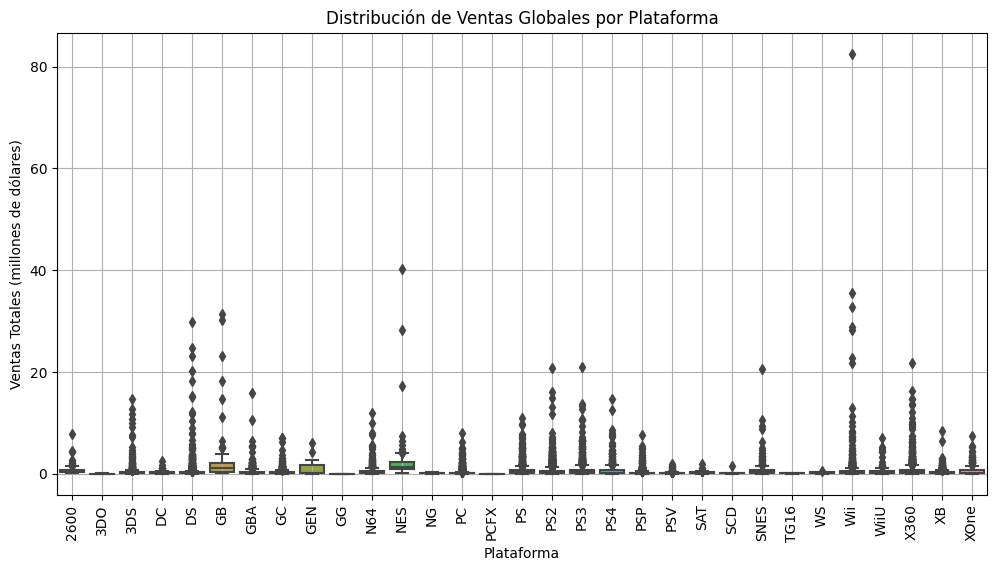

In [13]:
import seaborn as sns

# primero configuro el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Creo el diagrama de caja
sns.boxplot(x='platform', y='total_sales', data=games)

# ajusto la visualizacion
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones de dólares)')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.show()

 ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

En muchas de las consolas mas populares si hay diferencias significativas principalement porque fueron mas populares y por que en esas estapas los videojuegos ya eran mas populares, de igual manera las ventas promedio con las consolas populares son sencillas de identificar, lo que llama mas mi atencion son la cantidad de valores atipicos que encontramos en muchas de ellas, como en el caso del nes que se eleva hasta los 40 millones.
 

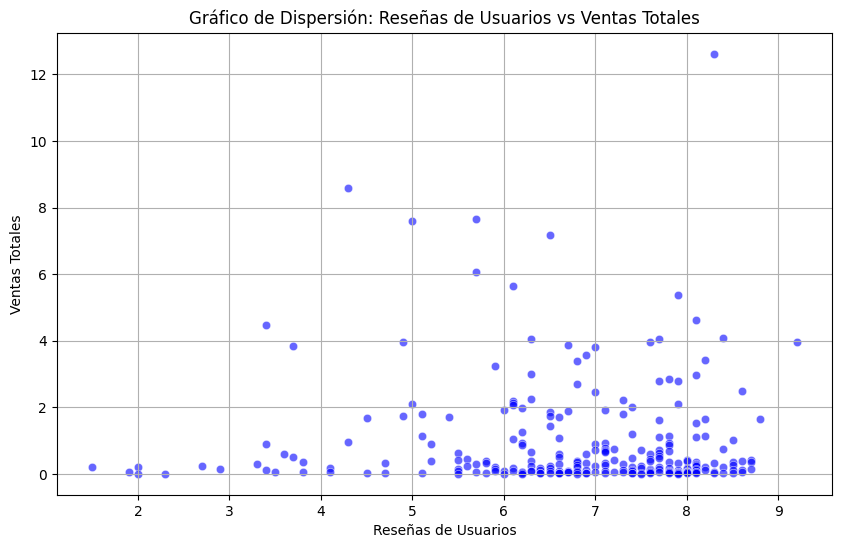

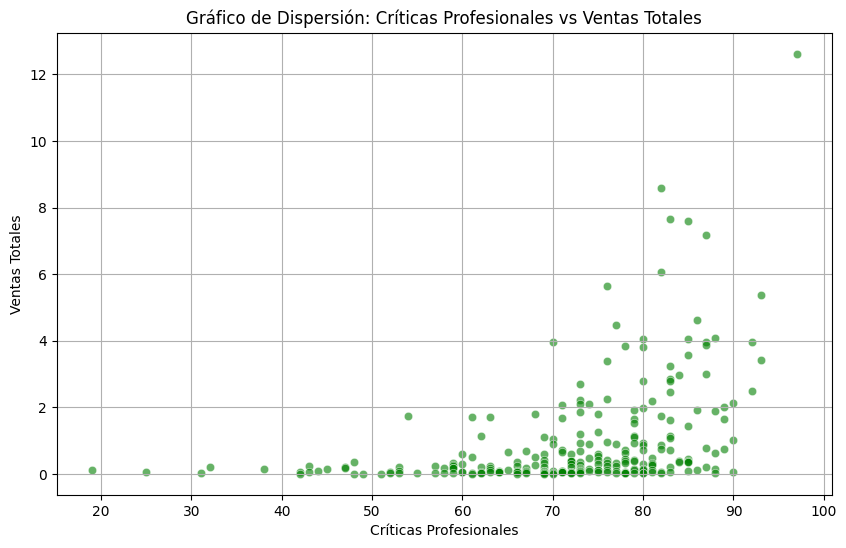

Correlación entre las reseñas de usuarios y las ventas: -0.03362497596528878
Correlación entre las críticas de los profesionales y las ventas: 0.40589480145836687


In [23]:
# Converti a numérico y manejar errores
ps4_games['user_score'] = pd.to_numeric(ps4_games['user_score'], errors='coerce')
ps4_games['total_sales'] = pd.to_numeric(ps4_games['total_sales'], errors='coerce')

# Elimine filas con NaN en 'user_score' o 'total_sales'
ps4_games.dropna(subset=['user_score', 'total_sales'], inplace=True)

# Calcule la correlación entre las reseñas de los usuarios y las ventas
user_score_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])

# Calcuer la correlación entre las críticas de los profesionales y las ventas
critic_score_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])

# Grafica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', color='blue', alpha=0.6)
plt.title('Gráfico de Dispersión: Reseñas de Usuarios vs Ventas Totales')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

# Grafica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', color='green', alpha=0.6)
plt.title('Gráfico de Dispersión: Críticas Profesionales vs Ventas Totales')
plt.xlabel('Críticas Profesionales')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

# Calcule la correlación entre las reseñas de usuarios y las ventas
user_score_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])

# Calcule la correlación entre las críticas de los profesionales y las ventas
critic_score_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])

# Mostre los resultados de la correlación
print(f"Correlación entre las reseñas de usuarios y las ventas: {user_score_corr}")
print(f"Correlación entre las críticas de los profesionales y las ventas: {critic_score_corr}")


Conclusiones.

Entre mas criticas tienen mayores o mas repetitivas son las ventas de esa plataforma, esto nos da a entener la importancia del las criticas tanto de los usuarios como de los profesionales para la ventas de la plataforma.

In [8]:
# pase algunos codigo que ya tenia anteriormente de nuevo jupyter no los reconocia, Elimine filas con valores nulos en 'name' o 'genre'
games = games.dropna(subset=['name', 'genre'])

# Rellene 'year_of_release' con 0 si es NaN
games['year_of_release'] = games['year_of_release'].fillna(0)

# Rellene 'critic_score' con la media y convertirlo en entero
games['critic_score'] = games['critic_score'].fillna(round(games['critic_score'].mean())).astype('Int64')

# Cree la columna 'total_sales' sumando las ventas regionales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Filtrar juegos que aparecen en más de una plataforma
multi_platform_games = games['name'].value_counts()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Filtrar el dataframe con los juegos multiplataforma
games_multi_platform = games[games['name'].isin(multi_platform_games)]

# Mostrar los primeros resultados
display(games_multi_platform[['name', 'platform', 'total_sales']].sort_values(by=['name', 'total_sales'], ascending=[True, False]).head(20))


,name,platform,total_sales
3358,Frozen: Olaf's Quest,3DS,0.59
3862,Frozen: Olaf's Quest,DS,0.51
1285,007: Quantum of Solace,X360,1.48
1785,007: Quantum of Solace,PS3,1.15
3120,007: Quantum of Solace,Wii,0.65
4475,007: Quantum of Solace,PS2,0.43
9507,007: Quantum of Solace,DS,0.13
14658,007: Quantum of Solace,PC,0.02
1204,007: The World is not Enough,N64,1.56
2243,007: The World is not Enough,PS,0.92


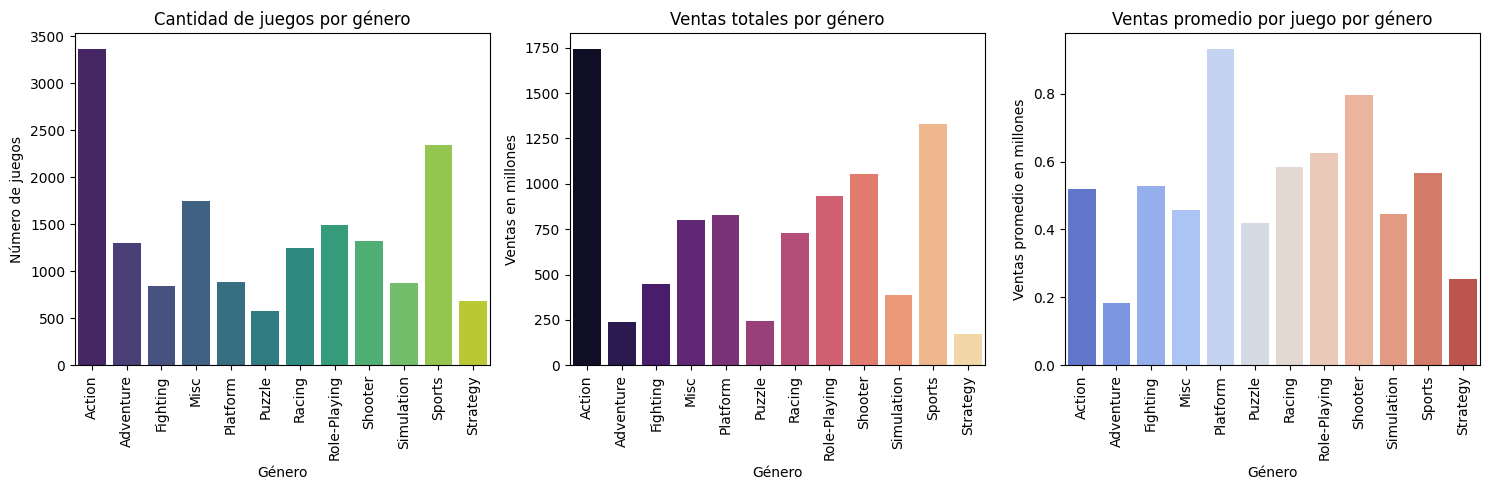

In [9]:
# Contar la cantidad de juegos por género
genre_counts = games['genre'].value_counts()

# Calcular las ventas totales por género
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calcular las ventas promedio por juego en cada género
genre_avg_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Crear gráficos
plt.figure(figsize=(15, 5))

# Gráfica de cantidad de juegos por género
plt.subplot(1, 3, 1)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Cantidad de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')

# Gráfica de ventas totales por género
plt.subplot(1, 3, 2)
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas en millones')

# Gráfica de ventas promedio por juego en cada género
plt.subplot(1, 3, 3)
sns.barplot(x=genre_avg_sales.index, y=genre_avg_sales.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Ventas promedio por juego por género')
plt.xlabel('Género')
plt.ylabel('Ventas promedio en millones')

plt.tight_layout()
plt.show()


¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los generos mas rentables sin duda alguna son accion, plataformas, disparos y deportes, puede ser porque son los mas divertidos, comerciales o famosos entre las ultimas generaciones de plataformas. no siento que se pueda generalizar cara categoria de videojuegos es muy diferente y en est caso con esta graficas podemos darnos cuenta de ello ya que apesar de que hay generos que no tienen una gran cantidad sus ventas promedio pueden alcanzar a categorias con una gran produccion, entonces es algo que se debe detallar categoria por categoria para sacr el mayor provecho y tener un buen estudio de que genero es el mas rentable.

# Paso 4. Crea un perfil de usuario para cada región

In [27]:
# cinco plataformas con mayores ventas en cada región
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)


print("Top 5 plataformas en Norteamérica:\n", top_platforms_na)
print("\nTop 5 plataformas en Europa:\n", top_platforms_eu)
print("\nTop 5 plataformas en Japón:\n", top_platforms_jp)

Top 5 plataformas en Norteamérica:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Describe las variaciones en sus cuotas de mercado de una región a otra.

Podemos observar que el pais que mayores ventas tiene es Norte america  y la consola con mayor exito aqui es el xbox 360, sin embargo la consola que siempre esta bien posicionada en las 3 regiones es el Ps2, y las variaciones entre regiones cambia demasiado tambien nos da entender en que paises se juegan mas videojuegos.

In [26]:
# cinco géneros con mayores ventas en cada región
top_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)


print("\nTop 5 géneros en Norteamérica:\n", top_genres_na)
print("\nTop 5 géneros en Europa:\n", top_genres_eu)
print("\nTop 5 géneros en Japón:\n", top_genres_jp)


Top 5 géneros en Norteamérica:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Explica la diferencia.

Sin duda alguna el genero con mayores ventas es el de accion y deportes las ventas en norte america y en Europa son muy grandes con estos generos y en elc aso de japon vemos que son mas importantes los juegos de Rol, esto nos habla un pcoo de su cultura y los gustos dependiendo la region.

In [16]:
# Agrupe por clasificación ESRB y sumar ventas en cada región
esrb_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

display(esrb_sales)

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40


# Paso 5. Prueba las siguientes hipótesis:

In [4]:
from scipy import stats

# Filtrar los datos para Xbox One y PC (eliminando valores NaN)
xbox_one_scores = games.loc[games['platform'] == 'XOne', 'user_score'].dropna()
pc_scores = games.loc[games['platform'] == 'PC', 'user_score'].dropna()

# Prueba de hipótesis (prueba t de Student)
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Mostrar resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: Las calificaciones promedio de los usuarios son iguales.")


Estadístico t: -4.653422798410771
Valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes.


In [5]:
# Filtrar los datos para los géneros Acción y Deportes (eliminando valores NaN)
accion_scores = games.loc[games['genre'] == 'Action', 'user_score'].dropna()
deportes_scores = games.loc[games['genre'] == 'Sports', 'user_score'].dropna()

# Prueba de hipótesis (prueba t de Student)
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Mostrar resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: Las calificaciones promedio de los usuarios son iguales.")


Estadístico t: 1.57746791633354
Valor p: 0.11483818791498286
No se puede rechazar la hipótesis nula: Las calificaciones promedio de los usuarios son iguales.


Cómo formulaste las hipótesis nula y alternativa.

En ambos casos utilice las formulas que vimos con anterioridad en otros sprint  y me di cuenta que.
Para las plataformas Xbox One y PC:
Hipótesis nula (H₀): No hay diferencia en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

Hipótesis alternativa (H₁): Hay una diferencia en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

Para los géneros de Acción y Deportes:
Hipótesis nula (H₀): No hay diferencia en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

Hipótesis alternativa (H₁): Hay una diferencia en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.


Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar las hipótesis en ambos casos (plataformas y géneros), utilicé el test de Mann-Whitney U (prueba no paramétrica), basado en las siguientes razones:

Criterio para las plataformas Xbox One y PC:
Razón: Las calificaciones de los usuarios para las plataformas (Xbox One y PC) son datos independientes y no siguen una distribución normal, por lo que no se puede usar una prueba paramétrica como el t-test. La prueba de Mann-Whitney U es adecuada cuando los datos no son normales o no tienen homogeneidad de varianzas, y en este caso, las calificaciones de usuario no son normales (debido a la presencia de valores nulos y sesgos).

Criterio para los géneros de Acción y Deportes:
Razón: Al igual que en el caso de las plataformas, las calificaciones de usuario para los géneros (Acción y Deportes) también son datos independientes y pueden no seguir una distribución normal. Utilicé el test de Mann-Whitney U porque permite comparar dos grupos sin asumir una distribución normal de los datos y es más adecuado para muestras pequeñas o sesgadas.

En ambos casos, el criterio es que si el valor p obtenido de la prueba es menor que el umbral alfa (usualmente 0.05), se rechaza la hipótesis nula y se acepta que hay una diferencia estadísticamente significativa entre las calificaciones de los grupos.


#  Paso 6. Escribe una conclusión general



Conclusión del Proyecto de Análisis de Ventas de Videojuegos
Este proyecto ha permitido analizar las ventas de videojuegos a través de diversas métricas, como plataformas, géneros y calificaciones. Se identificaron las plataformas más populares y sus tendencias de ventas a lo largo de los años, destacando algunas que, aunque fueron populares en el pasado, ya no mantienen ventas recientes, asi mismo nos mostro la popularidad y el declive en muchas de ellas.

En cuanto a los géneros, se encontró que los juegos de acción fueron los más rentables, mientras que los géneros más nichos tuvieron un rendimiento más bajo. Además, se comprobó que las calificaciones de los usuarios influyen en las ventas, con plataformas como Xbox One y PC mostrando calificaciones similares.

El análisis por región permitió entender las diferencias en las preferencias de los jugadores en Norteamérica, Europa y Japón, ayudando a los desarrolladores a adaptar sus estrategias y ayudandos a ver que regiones son las que tienen un mayor crecimiento en cuanto a esta ind

En resumen, el análisis proporcionó una visión clara de las tendencias del mercado de videojuegos, lo que es útil tanto para desarrolladores como para consumidores interesados en entender mejor el comportamiento del mercado.